In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
house_prices = pd.read_csv("kc_house_data.csv")

In [5]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
house_prices1=house_prices.drop(['id','date','long','lat','sqft_living15','sqft_lot15','zipcode','yr_renovated'],axis=1).dropna()

In [8]:
house_prices1['current_year']=2022

In [9]:
house_prices1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,current_year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,2022
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,2022
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2022
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,2022
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,2022


In [10]:
house_prices1['no_year']=house_prices1['current_year']-house_prices1['yr_built']

In [11]:
house_prices1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,current_year,no_year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,2022,67
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,2022,71
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2022,89
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,2022,57
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,2022,35


In [12]:
house_prices1.drop(['current_year','yr_built'],axis=1,inplace=True)

In [13]:
house_prices1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,no_year
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.054012
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.154178
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.506019
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.318049
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.053080
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.489319
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.026161
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.053440
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.361417
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.446963


In [14]:
house_prices1.groupby('price').mean().head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,no_year
price,,,,,,,,,,,,
75000.0,1.0,0.00,670.0,43377.0,1.0,0.0,0.0,3.0,3.0,670.0,0.0,56.0
78000.0,2.0,1.00,780.0,16344.0,1.0,0.0,0.0,1.0,5.0,780.0,0.0,80.0
80000.0,1.0,0.75,430.0,5050.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,110.0
81000.0,2.0,1.00,730.0,9975.0,1.0,0.0,0.0,1.0,5.0,730.0,0.0,79.0
82000.0,3.0,1.00,860.0,10426.0,1.0,0.0,0.0,3.0,6.0,860.0,0.0,68.0


In [15]:
house_prices1.groupby('price').min().head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,no_year
price,,,,,,,,,,,,
75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,56
78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,80
80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,110
81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,79
82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,68


In [16]:
house_prices1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'no_year'],
      dtype='object')

C:\Users\Saisujith Kandagatla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

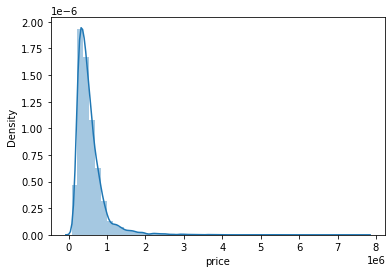

In [17]:
sns.distplot(house_prices1['price'])

In [18]:
house_prices1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,no_year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,50.994864
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,7.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,25.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,71.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,122.000000


In [19]:
house_prices1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  no_year        21613 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.3 MB


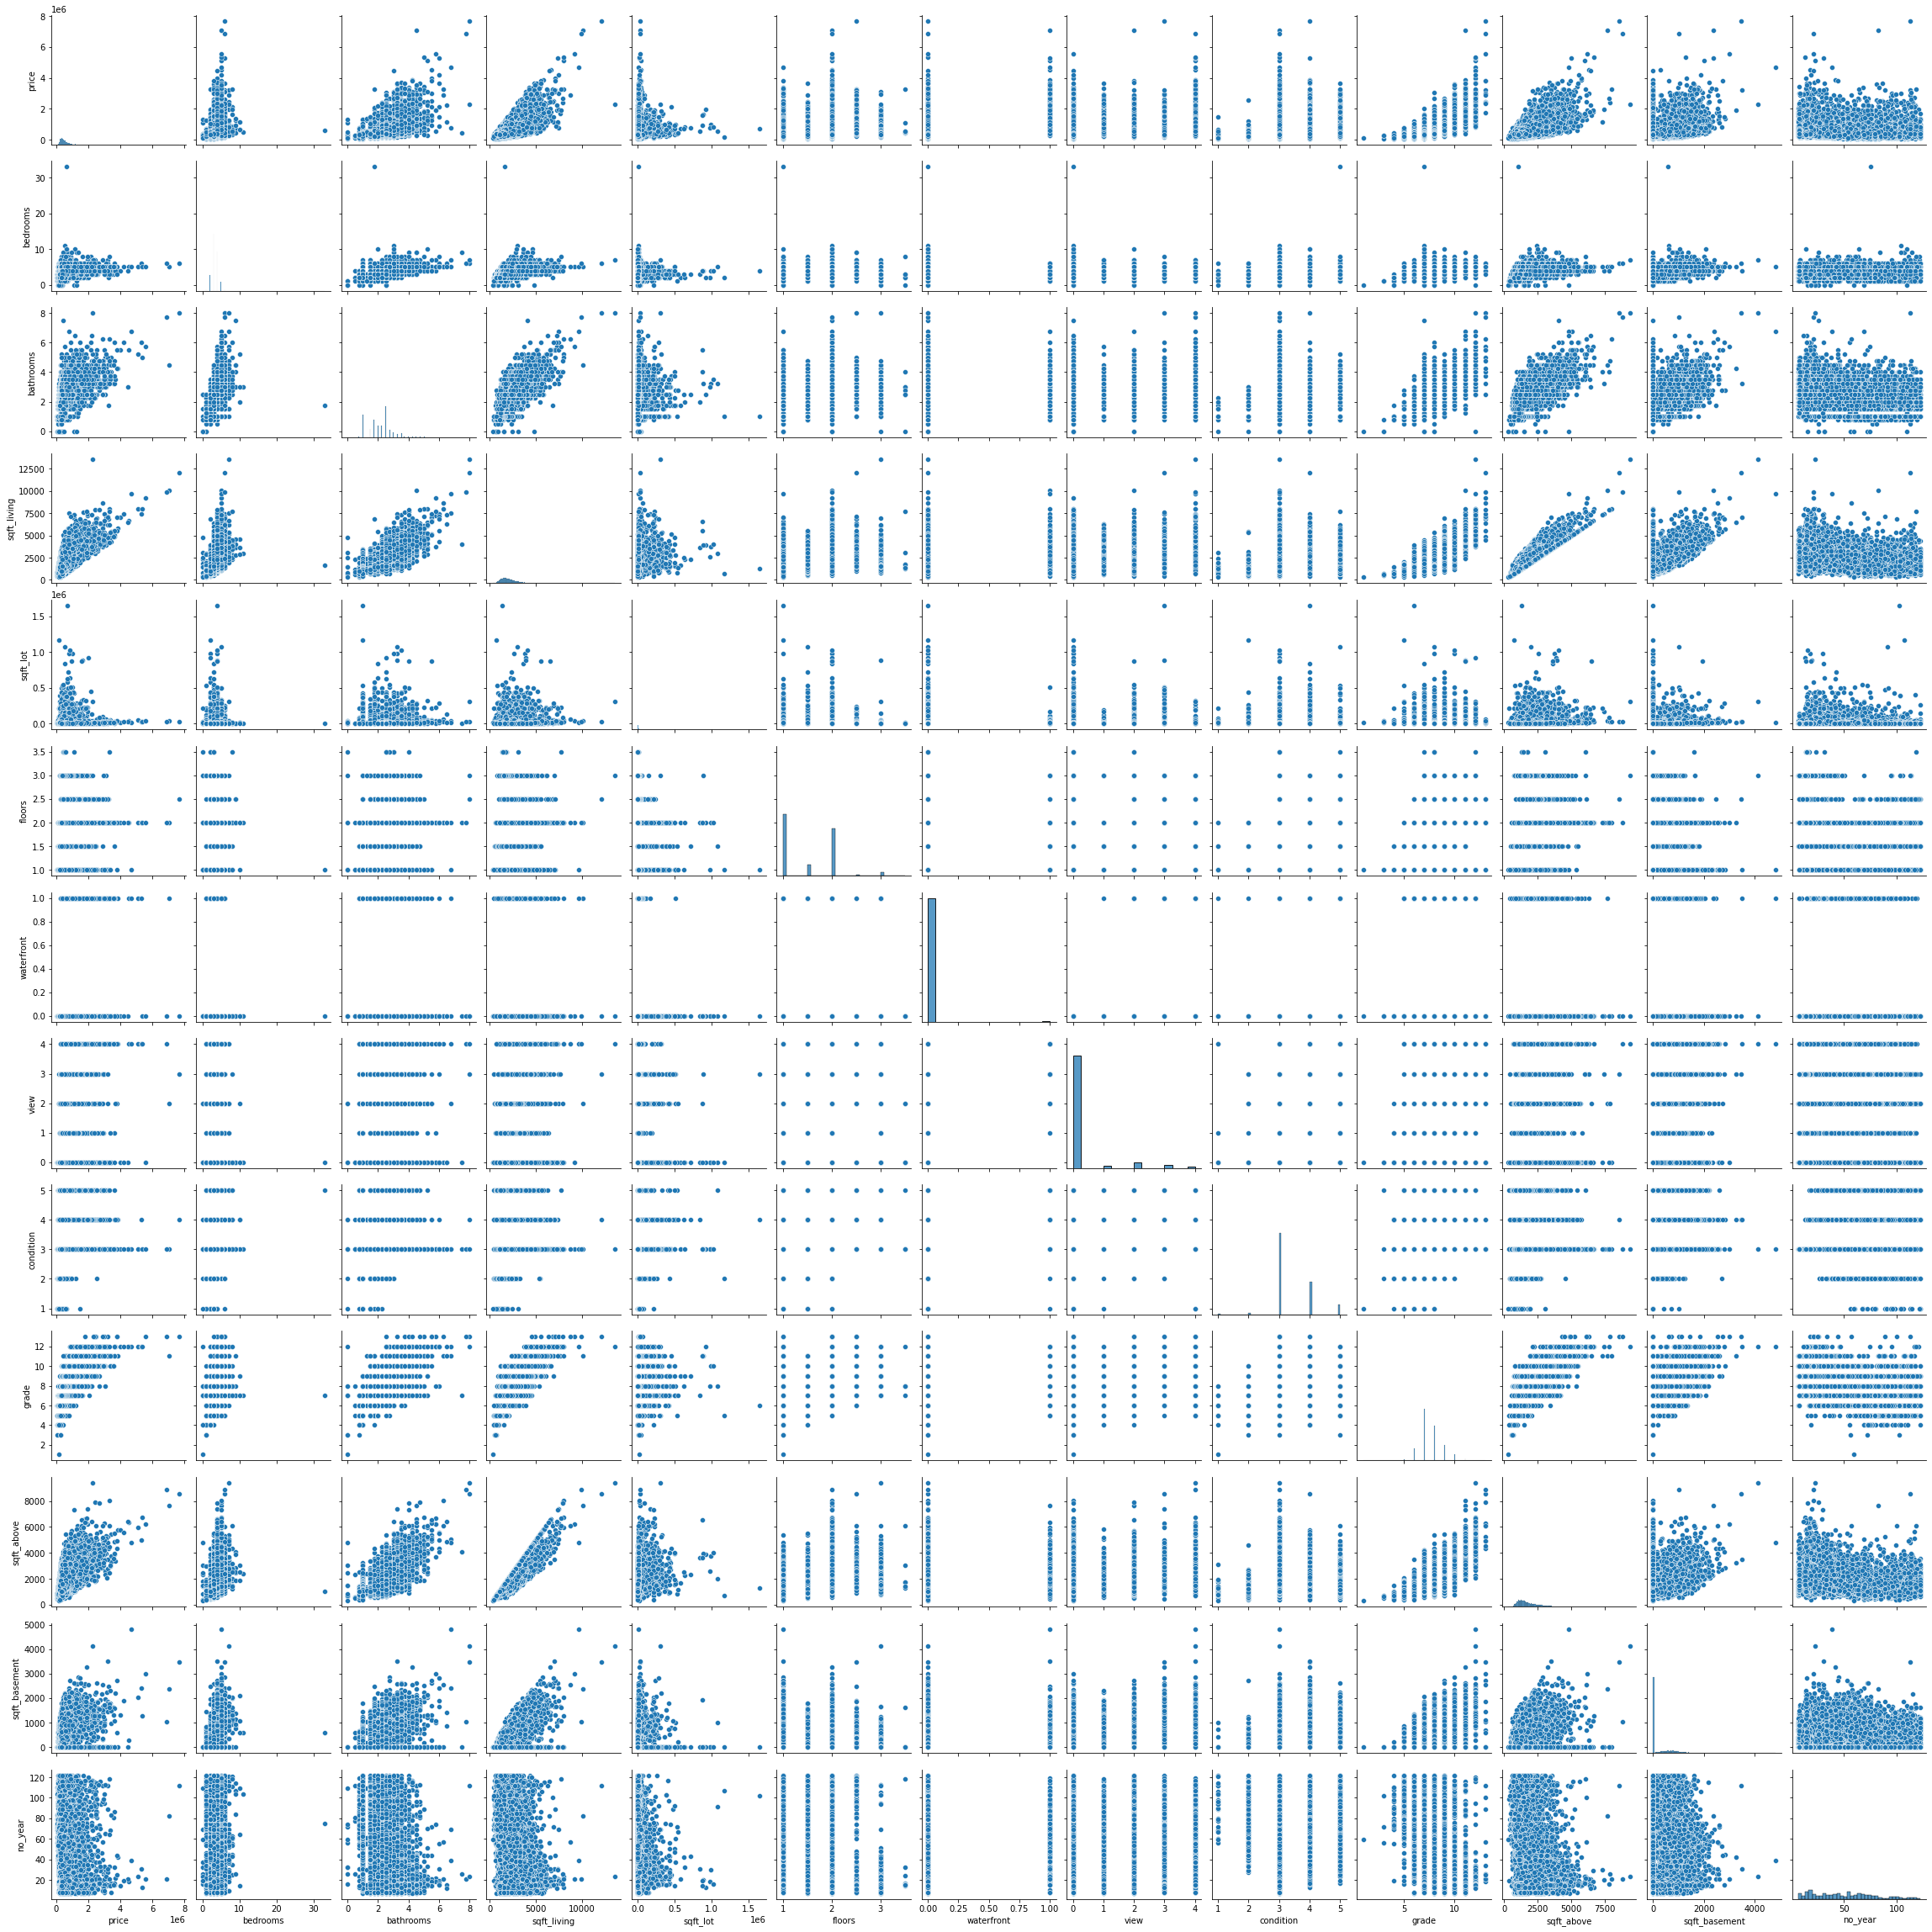

In [20]:
sns.pairplot(house_prices1)

<function matplotlib.pyplot.show(close=None, block=None)>

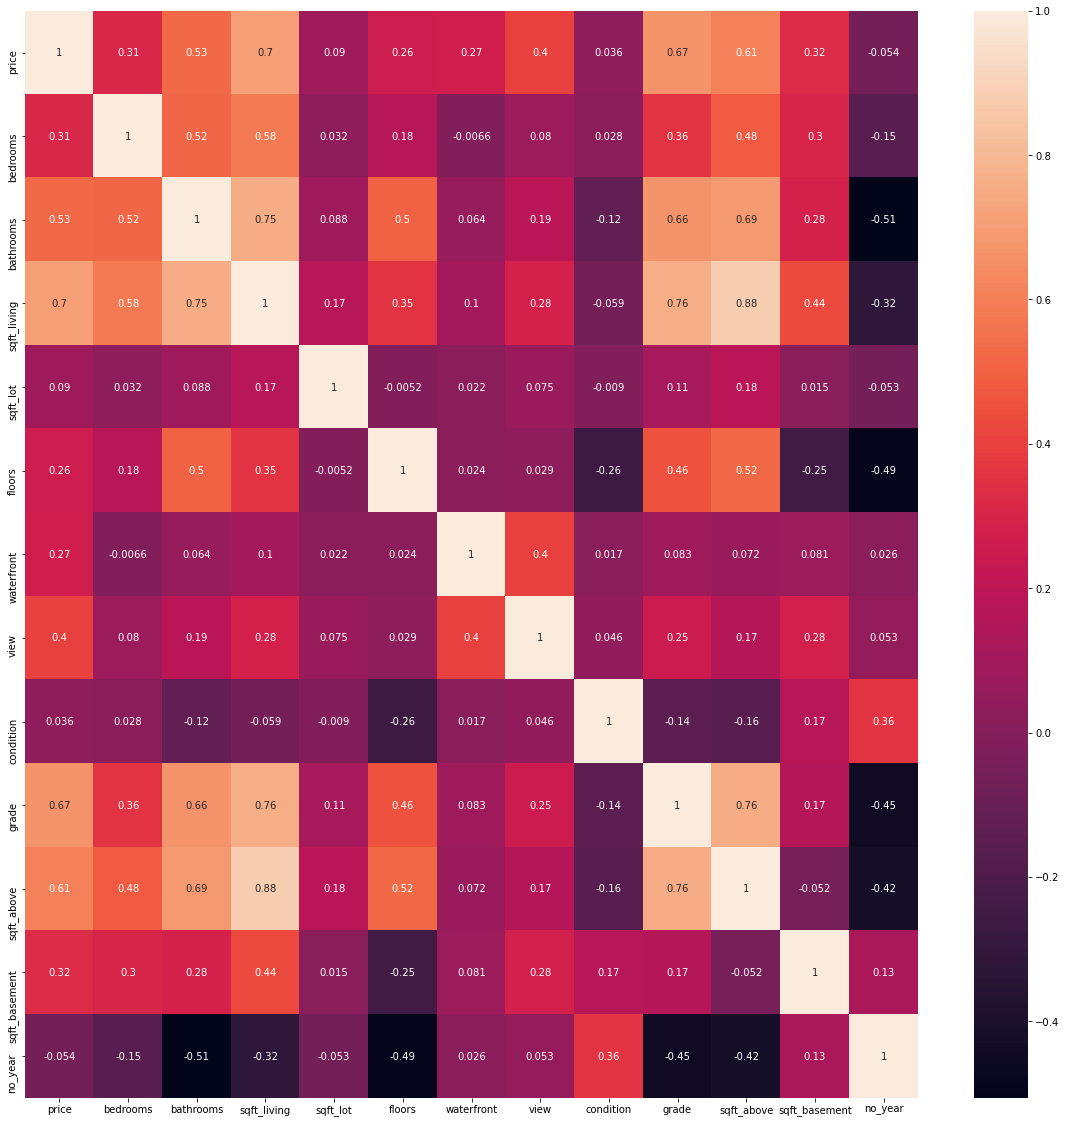

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(house_prices1.corr(),annot=True)
plt.show

Feature Selection
By using three methods we can select important Feature
1)Univariate selection
2)Feature Importance
3)Coorelation matrix with Heatmap

UNIVARIATE SELECTION

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
x1 = house_prices1.iloc[:,1:] #independent colums
y1 = house_prices1.iloc[:,0] #target colums

In [24]:
#Apply selectKbest class to extract top features
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(x1,y1)

In [25]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)

In [26]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['specs','scores'] #Naming the dataframe columns

In [27]:
featureScores

,specs,scores
0,bedrooms,1.540444e+03
1,bathrooms,2.721923e+03
2,sqft_living,5.497592e+06
3,sqft_lot,3.960291e+08
4,floors,1.123335e+03
5,waterfront,8.184489e+03
6,view,1.941399e+04
7,condition,5.273119e+02
8,grade,2.391929e+03
9,sqft_above,4.434142e+06


In [28]:
print(featureScores.nlargest(11,'scores'))

            specs        scores
3        sqft_lot  3.960291e+08
2     sqft_living  5.497592e+06
9      sqft_above  4.434142e+06
10  sqft_basement  4.405627e+06
11        no_year  8.147035e+04
6            view  1.941399e+04
5      waterfront  8.184489e+03
1       bathrooms  2.721923e+03
8           grade  2.391929e+03
0        bedrooms  1.540444e+03
4          floors  1.123335e+03


FEATURE IMPORTANCE

In [29]:
## Feature Importance is not working for this data as it as large number of rows it is showing 

CORRELATION MATRIX WITH HEATMAP

<AxesSubplot:>

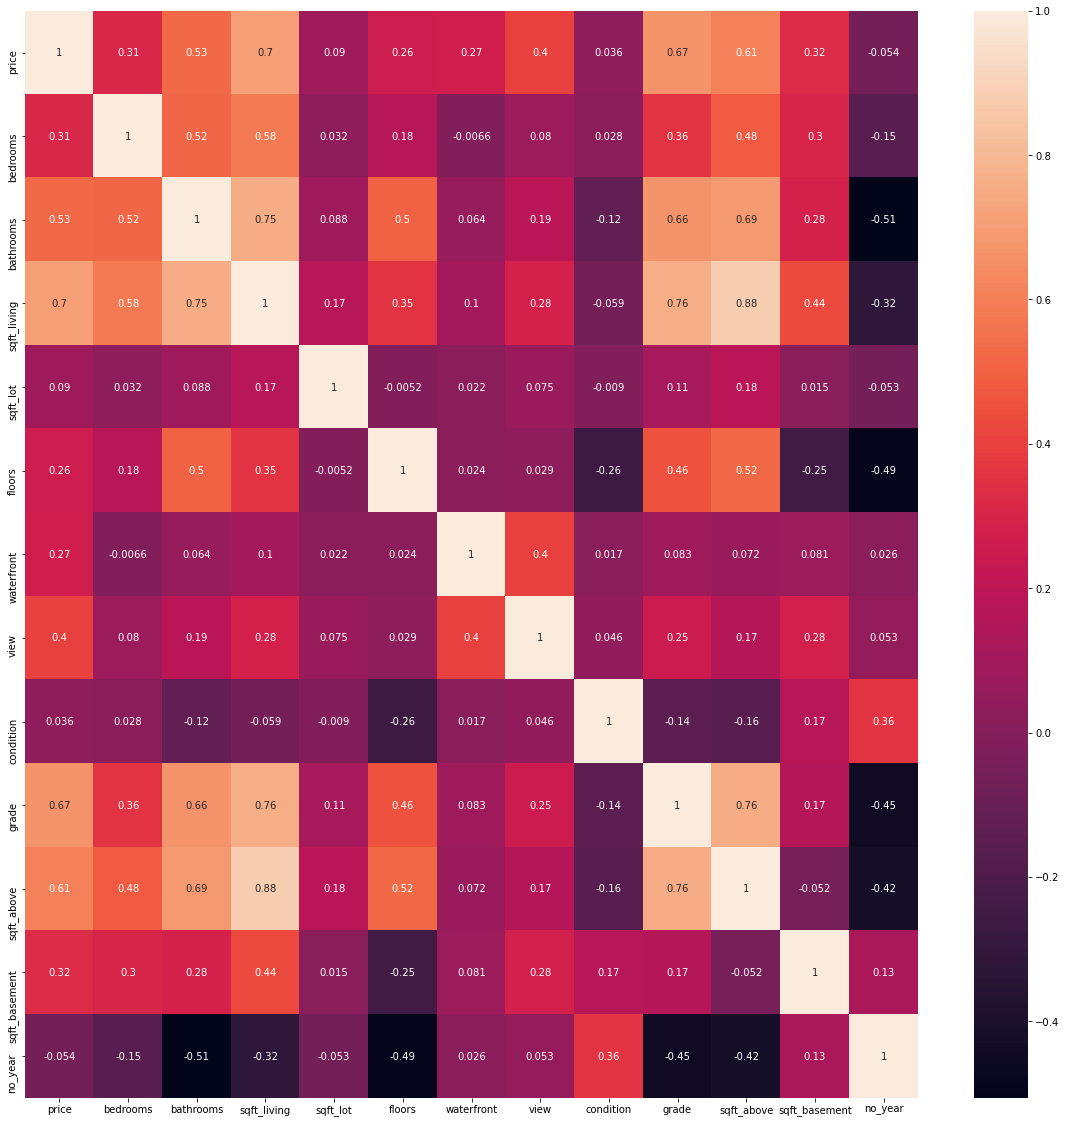

In [30]:

corrmat = house_prices1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot.heatmap
sns.heatmap(house_prices1[top_corr_features].corr(),annot=True)

In [31]:
house_prices1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'no_year'],
      dtype='object')

Train Test Split for fearture selection

In [32]:
X = house_prices1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'no_year']]
y = house_prices1['price']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Remove The correlation

In [34]:
threshold = 0.8

In [35]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
correlation(house_prices1.iloc[:,1:],threshold)

{'sqft_above'}


## Information Gain

In [37]:
from sklearn.feature_selection import mutual_info_classif

In [38]:
mutual_info=mutual_info_classif(X,y)

In [39]:
mutal_data = pd.Series(mutual_info,index=X.columns)
mutal_data.sort_values(ascending = False)

floors           0.592075
grade            0.518046
sqft_living      0.324352
bedrooms         0.298371
bathrooms        0.276640
condition        0.222476
sqft_above       0.210364
no_year          0.063965
sqft_basement    0.062407
view             0.060977
sqft_lot         0.060673
waterfront       0.006168
dtype: float64

In [40]:
# By the above methods few important features are selected to predicted the target variable
# It's time to build our model

In [41]:
final_df = house_prices1.drop(['sqft_above','waterfront','condition','view'],axis=1)

In [42]:
final_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_basement', 'no_year'],
      dtype='object')

In [43]:
X = final_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_basement', 'no_year']]
y = final_df['price']

Train Test Split for regression

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## LinearRegression

Creating and Traning the Model

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
#print the intercept
print(lm.intercept_)

-1041634.1444202394


In [48]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-50202.677024
bathrooms,45105.217181
sqft_living,180.569106
sqft_lot,-0.176791
floors,30043.821898
grade,133544.759122
sqft_basement,23.951852
no_year,4084.327503


Predictions from our Model

In [49]:
predictions = lm.predict(X_test)
predictions

array([ 516617.23506161,  596755.56853595,  482154.12862007, ...,
        497502.72512106,  186081.98350496, 1035206.11173624])

C:\Users\Saisujith Kandagatla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

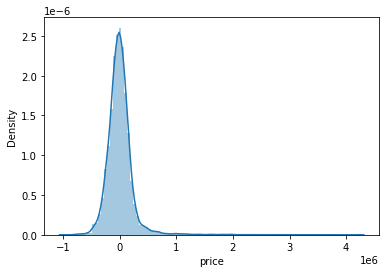

In [50]:
sns.distplot((y_test-predictions),bins=100)

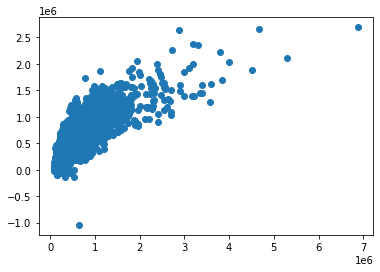

In [51]:
plt.scatter(y_test,predictions)

Evaluation

We can check precision,recall,f1-score using classification report!

In [52]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 144863.73102146052
MSE: 52920959707.063446
RMSE: 230045.56006813835


## Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor = RandomForestRegressor()

In [56]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [59]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [61]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [62]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  23.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [64]:
rf_random.best_score_

-41175389282.86884

In [65]:
predictions=rf_random.predict(X_test)

C:\Users\Saisujith Kandagatla\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

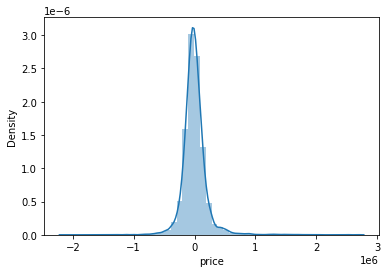

In [66]:
sns.distplot(y_test-predictions)

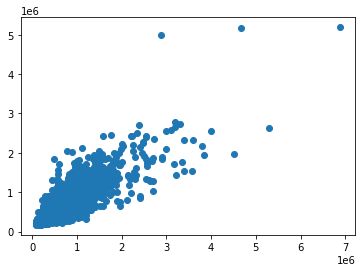

In [67]:
plt.scatter(y_test,predictions)

In [68]:
from sklearn import metrics

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 126056.80123197341
MSE: 41070229515.72416
RMSE: 202657.91254161324


In [70]:
import pickle

In [71]:
file  = open('random_forest_regression_model.pkl', 'wb')

#dump informaation to that file
pickle.dump(rf_random, file)

In [72]:
print(rf_random.predict([[1, 2,200, 100, 1, 7, 250, 5]]))

[311623.46745145]
